In [1]:
from algorithms import *
from evaluators import *
import matplotlib.pyplot as plt
import numpy as np
import warnings

np.random.seed(42)
warnings.filterwarnings("ignore")

{'alpha1': 34.73, 'alpha2': 49.36, 'alpha3': 32.73, 'alpha4': 49.54, 'delta1': 1.93, 'delta2': 0.69, 'Kd': 10.44, 'n': 4.35}


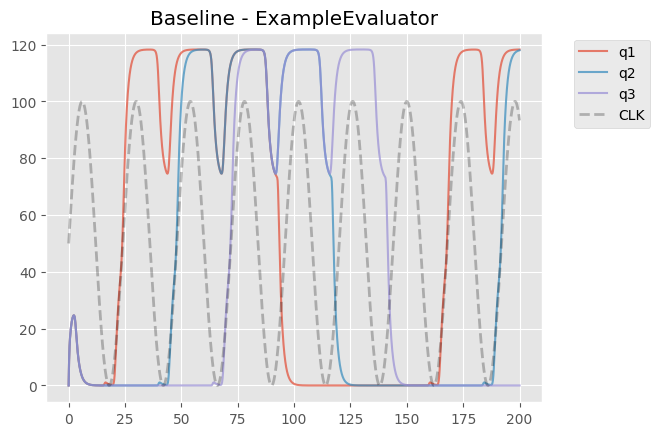

In [2]:
print(ExampleEvaluator().get_params())
ExampleEvaluator().simulate(algo='baseline')

In [3]:
best_params = GreyWolfOptimizer(GoalEvaluator, is_export=False).optimize_parameters(10, 20)
evaluation = GoalEvaluator(**best_params)
print(evaluation.evaluate())

Generation 1/20
Best Fitness: 5000
Generation 2/20
Best Fitness: 3000
Generation 3/20
Best Fitness: 1470.4699064478698
Generation 4/20
Best Fitness: 705.370714040701
Generation 5/20
Best Fitness: 690.3769119824922
Generation 6/20
Best Fitness: 543.6565793880808
Generation 7/20
Best Fitness: 479.1075022077291
Generation 8/20
Best Fitness: 580.9216475148162
Generation 9/20
Best Fitness: 544.6893845864566
Generation 10/20
Best Fitness: 591.6551034706988
Generation 11/20
Best Fitness: 661.4646467454102
Generation 12/20
Best Fitness: 857.5000263192794
Generation 13/20
Best Fitness: 875.69033121978
Generation 14/20
Best Fitness: 775.1488506164656
Generation 15/20
Best Fitness: 751.9379583090371
Generation 16/20
Best Fitness: 764.2770892583447
Generation 17/20
Best Fitness: 749.7987733470784
Generation 18/20
Best Fitness: 757.2356976475855
Generation 19/20
Best Fitness: 750.7247321483549
Generation 20/20
Best Fitness: 755.6391529509954
Best Fitness: 755.6391529509954
-749.5041427435484


{'alpha1': 14.944837981064321, 'alpha2': 10.502051426505941, 'alpha3': 14.944837981064321, 'alpha4': 14.944837981064321, 'delta1': 1.357801112110863, 'delta2': 1.1732635212250657, 'Kd': 3.4466606918805525, 'n': 4.405149513329953}


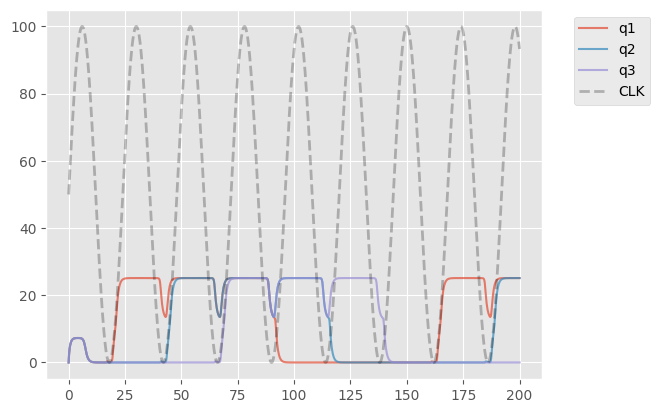

In [4]:
print(evaluation.get_params())
evaluation.simulate()

In [5]:
from joblib import Parallel, delayed

def optimize_params(optimizer):
    return optimizer.optimize_parameters(15, 50)

optimizers = [
    AntColonyOptimization(GoalEvaluator),
    WhaleOptimizationAlgorithm(GoalEvaluator),
    GeneticAlgorithm(GoalEvaluator),
    GreyWolfOptimizer(GoalEvaluator)
]

results = Parallel(n_jobs=len(optimizers))(
    delayed(optimize_params)(optimizer) for optimizer in optimizers
)

print(results)
ant, whale, genetic, wolf = results

[{'alpha1': 18.86095147009566, 'alpha2': 12.133469133419892, 'alpha3': 22.354303414007536, 'alpha4': 48.42891170342627, 'delta1': 43.89770856098938, 'delta2': 2.0646099258806583, 'Kd': 14.622869488378985, 'n': 3.2223038714948222}, {'alpha1': 18.930552675322627, 'alpha2': 28.02049523005237, 'alpha3': 0.37515114423147106, 'alpha4': 24.22540865201333, 'delta1': 32.02521093004585, 'delta2': 0.24767172430256032, 'Kd': 1.3825278759647475, 'n': 2.260391490089924}, {'alpha1': 41.321037469782524, 'alpha2': 29.31748455202132, 'alpha3': 28.617617450264937, 'alpha4': 23.453755065485737, 'delta1': 79.16069024618189, 'delta2': 56.02698983280122, 'Kd': 0.01, 'n': 4.452842882441781}, {'alpha1': 0.04842950029633105, 'alpha2': 0.10955045418056293, 'alpha3': 31.29051870141496, 'alpha4': 31.29051870141496, 'delta1': 0.0486489275249673, 'delta2': 1.4281492490369896, 'Kd': 1.9800129936882997, 'n': 31.287608712591172}]


{'alpha1': 18.86095147009566, 'alpha2': 12.133469133419892, 'alpha3': 22.354303414007536, 'alpha4': 48.42891170342627, 'delta1': 43.89770856098938, 'delta2': 2.0646099258806583, 'Kd': 14.622869488378985, 'n': 3.2223038714948222}
-1044.5945550789522


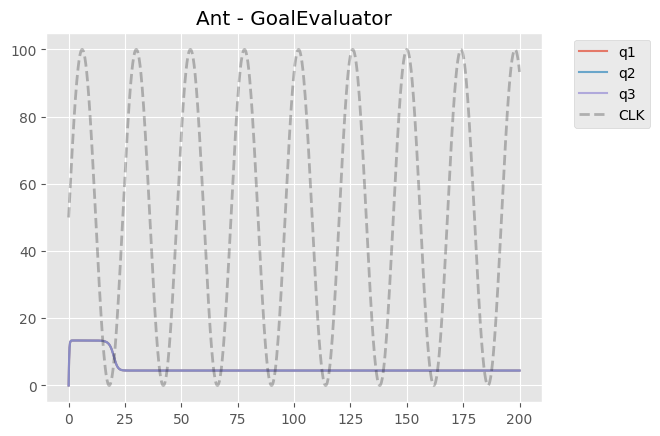

In [6]:
evaluation = GoalEvaluator(**ant)
print(evaluation.get_params())
print(evaluation.evaluate())
evaluation.simulate(algo='ant')

{'alpha1': 18.930552675322627, 'alpha2': 28.02049523005237, 'alpha3': 0.37515114423147106, 'alpha4': 24.22540865201333, 'delta1': 32.02521093004585, 'delta2': 0.24767172430256032, 'Kd': 1.3825278759647475, 'n': 2.260391490089924}
-1026.1690498824246


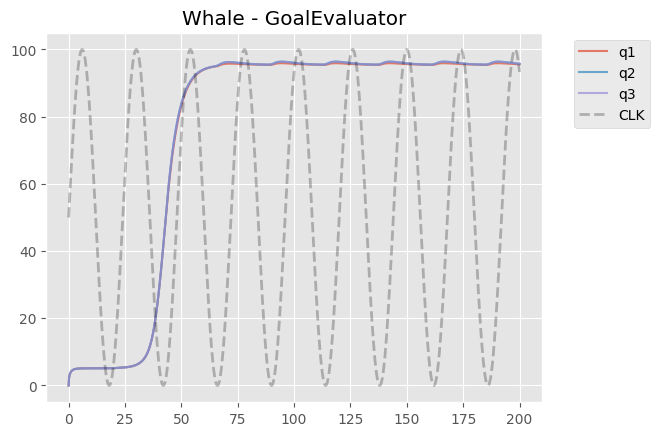

In [7]:
evaluation = GoalEvaluator(**whale)
print(evaluation.get_params())
print(evaluation.evaluate())
evaluation.simulate(algo='whale')

{'alpha1': 0.04842950029633105, 'alpha2': 0.10955045418056293, 'alpha3': 31.29051870141496, 'alpha4': 31.29051870141496, 'delta1': 0.0486489275249673, 'delta2': 1.4281492490369896, 'Kd': 1.9800129936882997, 'n': 31.287608712591172}
-1329.975536623692


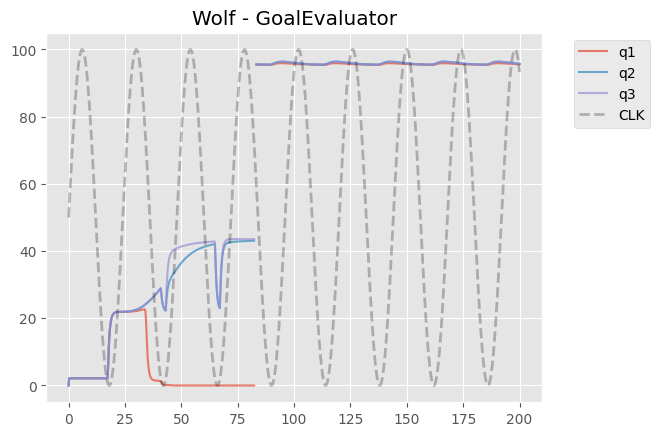

In [8]:
evaluation = GoalEvaluator(**wolf)
print(evaluation.get_params())
print(evaluation.evaluate())
evaluation.simulate(algo='wolf')

{'alpha1': 41.321037469782524, 'alpha2': 29.31748455202132, 'alpha3': 28.617617450264937, 'alpha4': 23.453755065485737, 'delta1': 79.16069024618189, 'delta2': 56.02698983280122, 'Kd': 0.01, 'n': 4.452842882441781}
-4000


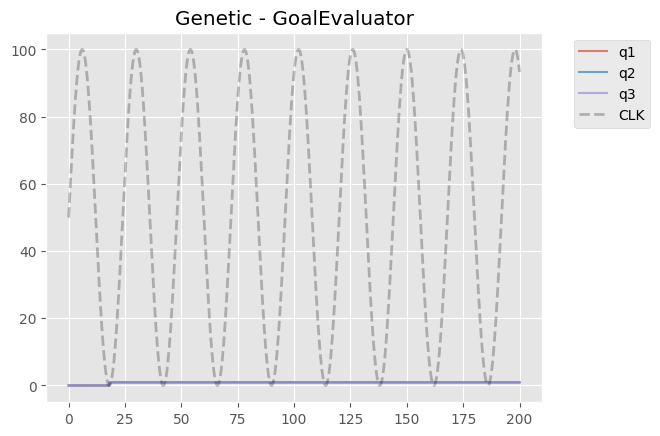

In [9]:
evaluation = GoalEvaluator(**genetic)
print(evaluation.get_params())
print(evaluation.evaluate())
evaluation.simulate(algo='genetic')